# **2017331088 Roman Raihan**

*importing necessary libraries*

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

# **Line Coding**

###**Line Coding Encoding - Unipolar - Non Return to Zero(NRZ)**

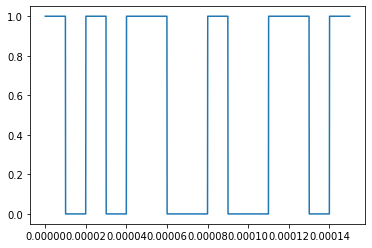

In [ ]:
"""

bits      =      Digital data elements(input bits row vector)
Time      =      Time period for sending 1 data elements
bit_rate  =      Bit rate(the number of data elements(bits) sent in 1s)
Fs        =      Sampling Rate
N         =      Bit Length of input bits
T         =      Interval of bit time period
x         =      Line coding row vector
t         =      Time vector for N bits
"""

bits = np.array([1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1]) 
Time = 10e-6   
bit_rate = 1/Time  
Fs = 4*bit_rate    
N = len(bits)   
T = np.linspace(0,Time,100)

x = np.array([])
for i in range(N):
  temp = bits[i]* np.ones(len(T))
  x = np.append(x, temp)
t = np.linspace(0,N*Time,len(x))

plt.plot(t, x)
plt.show()

###**Line Coding Decoding - Unipolar - Non Return to Zero(NRZ)**

In [ ]:
'''
x         =       Signal element(Line coding row vector)
t         =       Time vector for N bits
bit_rate  =       Bit rate(the number of data elements(bits) sent in 1s)
result    =       Data element

'''
result = []
counter = 0
for i in range(len(t)):
  if t[i]*bit_rate > counter:
    counter = counter + 1
    result.append(int(x[i]))

print(result)

[1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1]


#**Block Coding**


####**Block coding $4B/5B$ with $NRZ-I$ line coding scheme**

**Mapping Codes**

In [ ]:
mB = 4
nB = 5
block_coding_mapping_codes = {
# encoding map
"0000": "11110",
"0001": "01001",
"0010": "10100",
"0011": "10101",
"0100": "01010",
"0101": "01011",
"0110": "01110",
"0111": "01111",
"1000": "10010",
"1001": "10011",
"1010": "10110",
"1011": "10111",
"1100": "11010",
"1101": "11011",
"1110": "11100",
"1111": "11101",
# decoding map
"11110": "0000",
"01001": "0001",
"10100": "0010",
"10101": "0011",
"01010": "0100",
"01011": "0101",
"01110": "0110",
"01111": "0111",
"10010": "1000",
"10011": "1001",
"10110": "1010",
"10111": "1011",
"11010": "1100",
"11011": "1101",
"11100": "1110",
"11101": "1111",

}

def get_Mapping_Codes(bits):
  return block_coding_mapping_codes["".join(map(str, bits))]
  
'''
bits = sequence of bits to encoded using mB/nB
'''
def get_MB_NB_Encoding(bits, mB, nB):
  # If the length of bits is not multiple of mB, appends extra 0's at the end of the bits(optional)
  if len(bits) % mB != 0:
    # Necessary bit count to make it multiple of mB
    extra_len = (((len(bits)// mB) + 1) * mB) - len(bits)
    extra = np.array(np.zeros(extra_len), dtype=int)
    bits = np.append(bits, extra)
  
  encoded_bits_str = ""
  for i in range(0, len(bits), mB):
    encoded_bits_str += get_Mapping_Codes(bits[i:i+mB])
  
  # Convert the encoded bit string to list of bits
  encoded_bits_list = list(encoded_bits_str)
  encoded_bits_map = map(int, encoded_bits_list)
  encoded_bits = np.array(list(encoded_bits_map))
  return encoded_bits

'''
bits = sequence of bits to decoded using mB/nB
'''
def get_NB_MB_Decoding(bits, mB, nB):
  if len(bits) % nB != 0:
    print("Invalid length, Decoding Not possible!")
    return
  decoded_bits_str = ""
  for i in range(0, len(bits), nB):
    decoded_bits_str += get_Mapping_Codes(bits[i:i+nB])
  # Convert the decoded bit string to list of bits
  decoded_bits_list = list(decoded_bits_str)
  decoded_bits_map = map(int, decoded_bits_list)
  decoded_bits = np.array(list(decoded_bits_map))
  return decoded_bits


**$4B/5B$ Encoding**

In [ ]:
bits = np.array([1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1],dtype=int)
bits = get_MB_NB_Encoding(bits, mB, nB)

**$NRZ-I$ Line Coding Encoding**

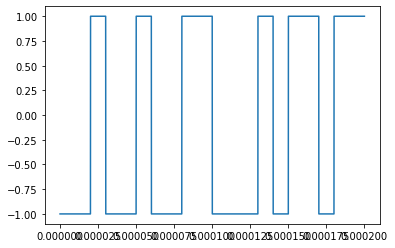

In [ ]:
'''

bits      -      Digital data elements(input bits row vector)
Time      -      Time period for sending 1 data elements
bit_rate  -      Bit rate(the number of data elements(bits) sent in 1s)
Fs        -      Sampling Rate
N         -      Bit Length of input bits
T         -      Interval of bit time period
x         -      Line coding row vector
t         -      Time vector for N bits
'''


Time = 10e-6   
bit_rate = 1/Time  
Fs = 4*bit_rate    
N = len(bits)   
T = np.linspace(0,Time, mB * 100)

x = np.array([])
last_bit = 1
for i in range(N):
  if bits[i] == 1:
    temp = (-1) * last_bit * np.ones(len(T))
    last_bit = -last_bit
  else:
    temp = last_bit * np.ones(len(T))
  x = np.append(x, temp)
t = np.linspace(0,N*Time,len(x))

plt.plot(t, x)
plt.show()

**$NRZ-I$ Line Coding Decoding**

In [ ]:
'''
x         -       Signal element(Line coding row vector)
t         -       Time vector for N bits
bit_rate  -       Bit rate(the number of data elements(bits) sent in 1s)
result    -       Data element

'''
result = []
counter = 0
last_bit = 1
for i in range(len(t)):
  if t[i]*bit_rate > counter:
    counter = counter + 1
    if x[i] != last_bit:
      result.append(1)
      last_bit=-last_bit
    else:
      result.append(0)

print(result)

[1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0]


**$4B/5B$ Decoding**

In [ ]:
decoded_result = get_NB_MB_Decoding(result, mB, nB)
print(decoded_result)

[1 0 1 0 1 1 0 0 1 0 0 1 1 0 1 0]
